# Predicting NY Crime
## Phase 1 : Data Preparation & Visualisation 

### RMIT University
### Master in Analytics
#### Machine Learning (MATH2319)
#### Group name : 56 
#### Name (ID) : Fabian Caballero (s3912233)


## Table of contents
* [Introduction](#i)
  + [Dataset Source](#ds)
  + [Dataset Details](#dd)
  + [Dataset Features](#df)
  + [Target Feature](#tf)
* [Problem Statement](#ps)
* [Data Preparation](#dp)
* [Data Visualisation](#dv)
  + [Univariate Analysis](#ua)
  + [Multivariate Analysis](#ma)
* [Literature Review](#lr)
* [Conclusions](#c)
* [References](#r)

## Introduction <a id='i'></a>

Los Angeles is a big city that must spend a significant of its resources to prevent crime in the streets. LA Police officers has the responsibility of guarantee security and prevent major incidents in the city. However, due the enormous amount of crimes happening every day in Los Angeles, watching all the citizens becomes a challenging task for the force. For this reason, technology development such as machine learning models can be useful to identify future crimes based on historical incidents. This study will propose a machine learning model to identify risk areas for crime based on historical features of LA police crime dataset from 2020.

### Dataset Source <a id='ds'></a>
The LA crime dataset contains crime records of the LAPD (Los Angeles Police Department) from 2020. The data was  sourced from Data Catalog(LAPD,2023)

### Dataset Details <a id='dd'></a>
The dataset contains observations of reported crimes in Los Angeles from 2020 until the last update the 25th of March of 2023. This records contain unique ID  of the incident, date of the occurrence, Area, geographic location. Additionally, each record has information about the demography of the victim and the type of crime. This set of variables can be helpful to model predictions of areas sensibles to crime.

The LA Crime Dataset has 28 features and 690,454 observations. However, the following variable will be excluded because most of them are equal to the main variable but with a different structure. Also, a few variables could generate noise in the model because the uniqueness of their values. 


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) 

df_i = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df_i.head()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

In [2]:
df_i.drop(['DR_NO','Date Rptd','AREA NAME','Rpt Dist No','Part 1-2','Crm Cd Desc','Mocodes','Premis Desc','Weapon Desc','Status','Status Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','LOCATION','Cross Street'],axis=1,inplace=True)
df_i.head()


,DATE OCC,TIME OCC,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON
0,01/08/2020 12:00:00 AM,2230,3,624,36,F,B,501.0,400.0,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,1,624,25,M,H,102.0,500.0,34.0459,-118.2545
2,02/13/2020 12:00:00 AM,1200,1,845,0,X,X,726.0,NaN,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,1730,15,745,76,F,W,502.0,NaN,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,19,740,31,X,X,409.0,NaN,34.2198,-118.4468


### Dataset Features <a id='df'></a>

The features required for this model are described in this section. The main definition of the variables was directly taken from Data Catalog.

* $DATE$ $OCC$ [Time] : Initially is defined by standard time structure MM/DD/YYYY. However, the values format from this variable will   change to just described the day of the week when the crime occurred.
* $TIME$ $OCC$ [Numerical Discrete] : 24 hour military time format of the occurrence.
* $AREA$ [Categorical] : LAPD has 21 community police stations around the LA geography and each police station has an area code
* $Crm$ $Cd$ [Categorical] : Defines the crime committed by a crime code.
* $Vict$ $Age$ [Numerical Discrete] : Describes the age of the victim.
* $Vict$ $Sex$ [Categorical] : Describe sex of the victim.
* $Vict$ $Descent$ [Categorical] : Describe descent profile of the victim.
* $Premis$ $Cd$ [Categorical] : The type of structure, vehicle, or location where the crime took place. 
* $Weapon$ $Used$ $Cd$ [Categorical] : The type of weapon used in the crime.
* $LAT$ [Numerical Continuous] : Geographic information of the crime (Latitude).
* $LON$ [Numerical Continuous] : Geographic information of the crime (Longitude).

### Target Feature <a id='tf'></a>

For this model, the target feature will be the AREA code of LAPD. This target will predict the area when the next crime occur based on historical information of crimes and demography of victims.

## Problem Statement <a id='ps'><a/>
    
Los Angeles Police Department has 21 community police stations working on the security of citizens and visitor of Los Angeles. LADP has the responsibility to prevent or to reduce victim crimes in the city. For this reason, predictive models can be potential tools to optimize the deployment of police force across the LA in a efficient manner. For example, if the Police Department simulates a crime with certain specification such as victim sex, victim age, time of the day and day of the week, etc., It will be able to identify the area where the crime will occur. As a result, depending of the type of crime, the department can deploy the efficient number of police officers to the area and they can prevent crimes in optimal manner.
    
Thus, the goal of this project is to propose a predictive model to identify vulnerable areas based on historical crime information and descriptive features. This goal can be reached by completing these three objectives. Firstly, Prepare the dataset for analysis and model by preproccesing the features. Secondly, Analyse the LAPD dataset by descriptive statistics and visualisations  to comprehend values behave in each variable and relationships between the features. Finally, predict susceptible areas for crime based on historical information collected from the Police Department.


## Data Preparation <a id='dp'></a>

Data preparation is essential  to guarantee the quality of the model. This section will describe the steps required to clean and prepare data for analysis.


* Features that are irrelevant for this model were removed in the introduction section.

* Column names needs to be modified for coding simplicity 

In [3]:
df_i.columns
df_i = df_i.rename(columns = {'DATE OCC': "occ_day",
                              'TIME OCC': "occ_militar_time",
                              'AREA':'area',
                              'Crm Cd':'crm_code',
                              'Vict Age':'vict_age',
                              'Vict Sex':'vict_sex',
                              'Vict Descent':'vict_descent',
                              'Premis Cd':'premis_code',
                              'Weapon Used Cd':'weapon_used_code',
                              'LAT':'lat',
                              'LON':'lon'})
df_i.head()

,occ_day,occ_militar_time,area,crm_code,vict_age,vict_sex,vict_descent,premis_code,weapon_used_code,lat,lon
0,01/08/2020 12:00:00 AM,2230,3,624,36,F,B,501.0,400.0,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,1,624,25,M,H,102.0,500.0,34.0459,-118.2545
2,02/13/2020 12:00:00 AM,1200,1,845,0,X,X,726.0,NaN,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,1730,15,745,76,F,W,502.0,NaN,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,19,740,31,X,X,409.0,NaN,34.2198,-118.4468


* Identify data types and value formats

Python has read some of the value features as integer when they must be categorical string values. This is because, these variables are numerical codes that help to describe values but for python these codes are numerical. For this reason, it is required to change the data type of these features.

In [4]:
# Setting data types of the features

df_i['occ_day']=pd.to_datetime(df_i['occ_day'])
df_i['area']=pd.Categorical(df_i['area'])
df_i['crm_code']=pd.Categorical(df_i['crm_code'])
df_i['vict_sex']=pd.Categorical(df_i['vict_sex'])
df_i['vict_descent']=pd.Categorical(df_i['vict_descent'])
df_i['crm_code']=pd.Categorical(df_i['crm_code'])
df_i['premis_code']=pd.Categorical(df_i['premis_code'])
df_i['weapon_used_code']=pd.Categorical(df_i['weapon_used_code'])
print(df_i.dtypes)
print(df_i.shape)


occ_day             datetime64[ns]
occ_militar_time             int64
area                      category
crm_code                  category
vict_age                     int64
vict_sex                  category
vict_descent              category
premis_code               category
weapon_used_code          category
lat                        float64
lon                        float64
dtype: object
(690454, 11)


In [5]:
df_i.head()

,occ_day,occ_militar_time,area,crm_code,vict_age,vict_sex,vict_descent,premis_code,weapon_used_code,lat,lon
0,2020-01-08,2230,3,624,36,F,B,501.0,400.0,34.0141,-118.2978
1,2020-01-01,330,1,624,25,M,H,102.0,500.0,34.0459,-118.2545
2,2020-02-13,1200,1,845,0,X,X,726.0,NaN,34.0448,-118.2474
3,2020-01-01,1730,15,745,76,F,W,502.0,NaN,34.1685,-118.4019
4,2020-01-01,415,19,740,31,X,X,409.0,NaN,34.2198,-118.4468


* Summary of descriptive statistics 
The table below is the first view of all the features. In overall, it describes basic statistics fro catergarical and numerical variables. For instance, It is possible to observe that the area 1 of LA is the most vulnerable area for crime occurrences and  the average age of victims is 30 years old.

In [6]:
df_i.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
occ_day,690454,1182,2022-12-02 00:00:00,1115,2020-01-01,2023-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occ_militar_time,690454.0,NaN,NaN,NaN,NaT,NaT,1333.684692,654.383978,1.0,900.0,1412.0,1900.0,2359.0
area,690454.0,21.0,1.0,46118.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crm_code,690454.0,138.0,510.0,74370.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vict_age,690454.0,NaN,NaN,NaN,NaT,NaT,29.975965,21.683168,-2.0,12.0,31.0,45.0,120.0
vict_sex,599971,4,M,286935,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vict_descent,599965,19,H,212455,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
premis_code,690446.0,309.0,101.0,174075.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weapon_used_code,239966.0,79.0,400.0,128861.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,690454.0,NaN,NaN,NaN,NaT,NaT,33.961747,1.951962,0.0,34.0132,34.0583,34.1631,34.3343


* Identifcation of mission values

There is a significant wuantity of missing values within the features of `victim_sex`,`victim_age` and `weapon_used_code`. `premis_code` only has 8 missing values.

In [7]:
df_i.isnull().sum()
df_i.isna().sum()


occ_day                  0
occ_militar_time         0
area                     0
crm_code                 0
vict_age                 0
vict_sex             90483
vict_descent         90489
premis_code              8
weapon_used_code    450488
lat                      0
lon                      0
dtype: int64

It is possible to assume that missed values for `victim_sex` and `victim_age` are human error at the moment of police report. As a result, this observation will be removed from the analysis to improve consistency in the dataset. However, 

`weapon_used_code` missing values required different assumption. There are two points to consider, (1) not all crimes required of a weapon to be committed and (2) a null value could be consider as an $Unknown$ which has the code 500. For this reason, instead of removing this missing values, they were classified as 500 weapon_used_code. Finally, the `victim_sex` feature is filtered to removed values "H" and "X" because this values are not able to describe any profile of the victims. This variable could have mistakes during the entry process.

These changes reduced the dataset from 690,454 rows to 516,988 rows

In [8]:
# Removing missing values
df_1 = df_i.dropna(subset=["vict_sex","vict_descent","premis_code"])


# Filling NaN values with category code 500.0 within weapon_used_code
df_1["weapon_used_code"]=df_1["weapon_used_code"].fillna(500.0)

# Victim age > 0
df_1 = df_1[df_1['vict_age'] >0]

# Victim sex re labelling
df_1 = df_1[df_1["vict_sex"]!="H"]
df_1 = df_1[df_1["vict_sex"]!="X"]


print("The new shape of the dataset after removing missing values",df_1.shape)
df_1.isna().sum()


The new shape of the dataset after removing missing values (516988, 11)


occ_day             0
occ_militar_time    0
area                0
crm_code            0
vict_age            0
vict_sex            0
vict_descent        0
premis_code         0
weapon_used_code    0
lat                 0
lon                 0
dtype: int64

* Generation of random sample

This step is required because the current size of dataset may slow future analysis and it is not required to have the full data to build the predictive model. The sampling was randomly generated to select 5% of the total of  observations (29,998).

In [9]:
# Sampling data
df_sample = df_1.sample(n=29998, random_state=999)
print(df_sample.shape)
df_sample.sample(10, random_state=999)

(29998, 11)


,occ_day,occ_militar_time,area,crm_code,vict_age,vict_sex,vict_descent,premis_code,weapon_used_code,lat,lon
592859,2022-02-09,1645,21,354,66,M,W,501.0,500.0,34.1744,-118.6103
357100,2021-06-25,1411,8,354,55,M,O,501.0,500.0,34.0649,-118.4372
407618,2021-05-21,2200,17,440,37,F,H,501.0,400.0,34.2512,-118.4984
563617,2022-08-08,1705,15,903,36,M,O,501.0,500.0,34.1722,-118.3763
621856,2022-04-02,2130,9,235,18,M,H,101.0,102.0,34.1603,-118.4399
309261,2021-02-22,2000,10,930,55,M,H,501.0,511.0,34.1975,-118.4837
60531,2020-10-05,2025,1,341,31,F,W,102.0,500.0,34.0430,-118.2606
396883,2021-12-29,1500,2,624,31,M,H,101.0,500.0,34.0565,-118.2768
553832,2022-05-01,655,13,354,28,F,B,750.0,500.0,33.9916,-118.2701
579766,2022-07-12,550,1,624,45,M,B,102.0,400.0,34.0460,-118.2510


* Finally,the value format for `occ_day` needed to be change to extract just the weekday value.

This step is applied after the sampling because the process time required to execute this action is significant. 

In [10]:
from datetime import datetime


for i in df_sample.index:
    df_sample['occ_day'][i] = datetime.weekday(df_sample['occ_day'][i])


The weekday from each value of these feature was extracted by using 'datetime' function from datetime module. Now the values are categorical from 0 to 6, where 0 is equal to Monday and  6 is equal to Sunday.

In [11]:
df_sample.head()

,occ_day,occ_militar_time,area,crm_code,vict_age,vict_sex,vict_descent,premis_code,weapon_used_code,lat,lon
596348,1,1210,4,354,38,F,H,503.0,500.0,34.0234,-118.2102
683889,3,1600,3,624,17,F,B,502.0,400.0,34.0055,-118.2937
221084,5,1530,1,740,41,M,H,122.0,500.0,34.0459,-118.2526
527014,0,1606,1,341,19,M,C,124.0,500.0,34.0566,-118.2318
429174,0,1207,7,354,35,F,H,501.0,500.0,34.0623,-118.3462


## Data Visualisation <a id='dv'></a>

The dataset was pre proccesed and it is ready to be used in analysis and modelling.

### Univariate Analysis <a id='ua'></a>

* Bar chart of ranking of areas most vulnerable for crime

The chart below illustrates the top 10 areas affected by crime. In overall, the area 1 of LA has the top number of crime occurrence with over 2000 crimes from 2020 until now. After these community, the areas 12,14,6,3 are the areas with high levels of criminality oscillating from 1500 to 2000 crimes from 2020.

In the other hand, the Figure 2 shows how many occurrences have the areas with lowest report of crime. In general, the number of crimes reported are under 1300 reports from 2020.

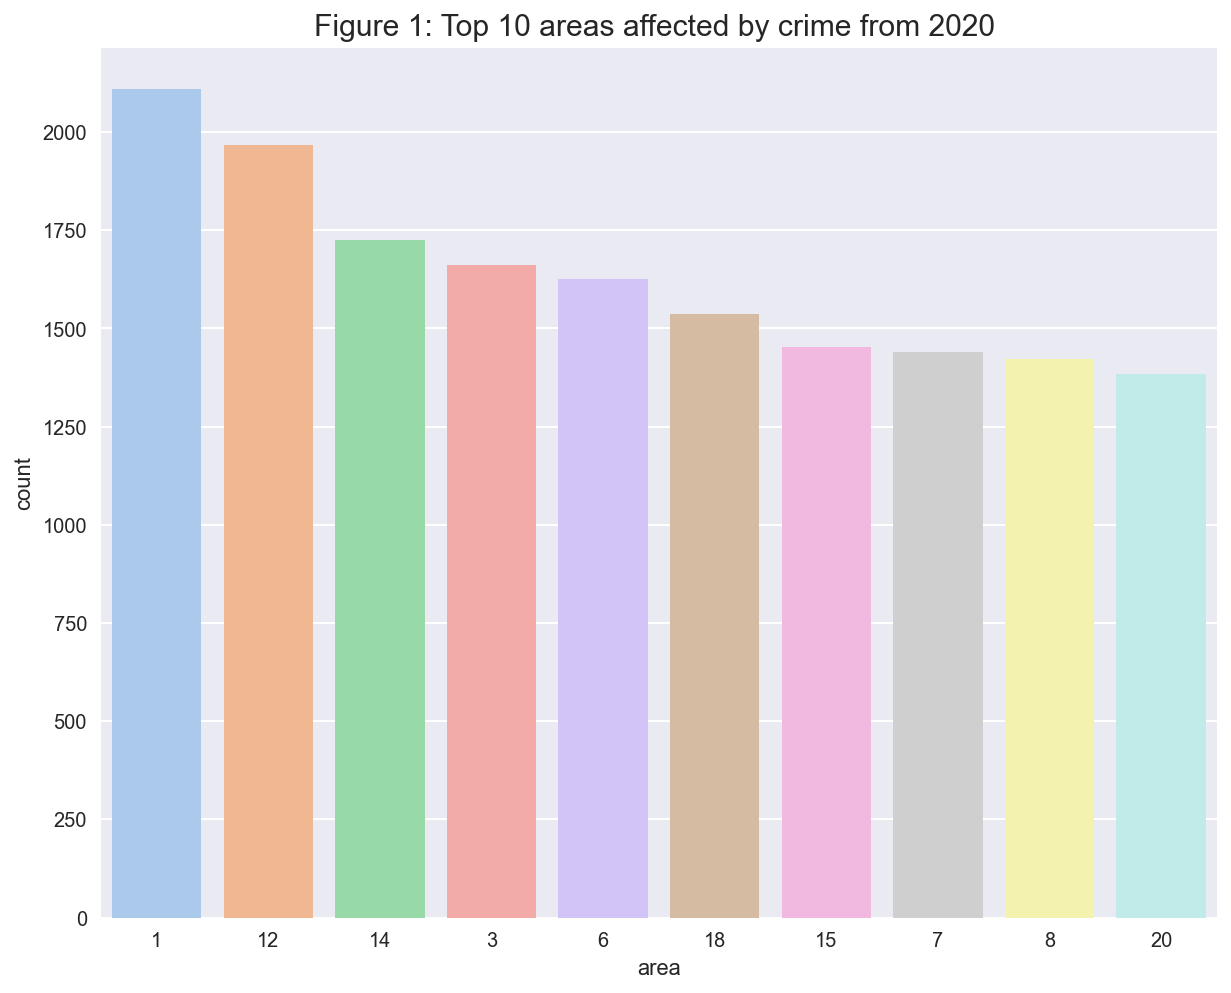

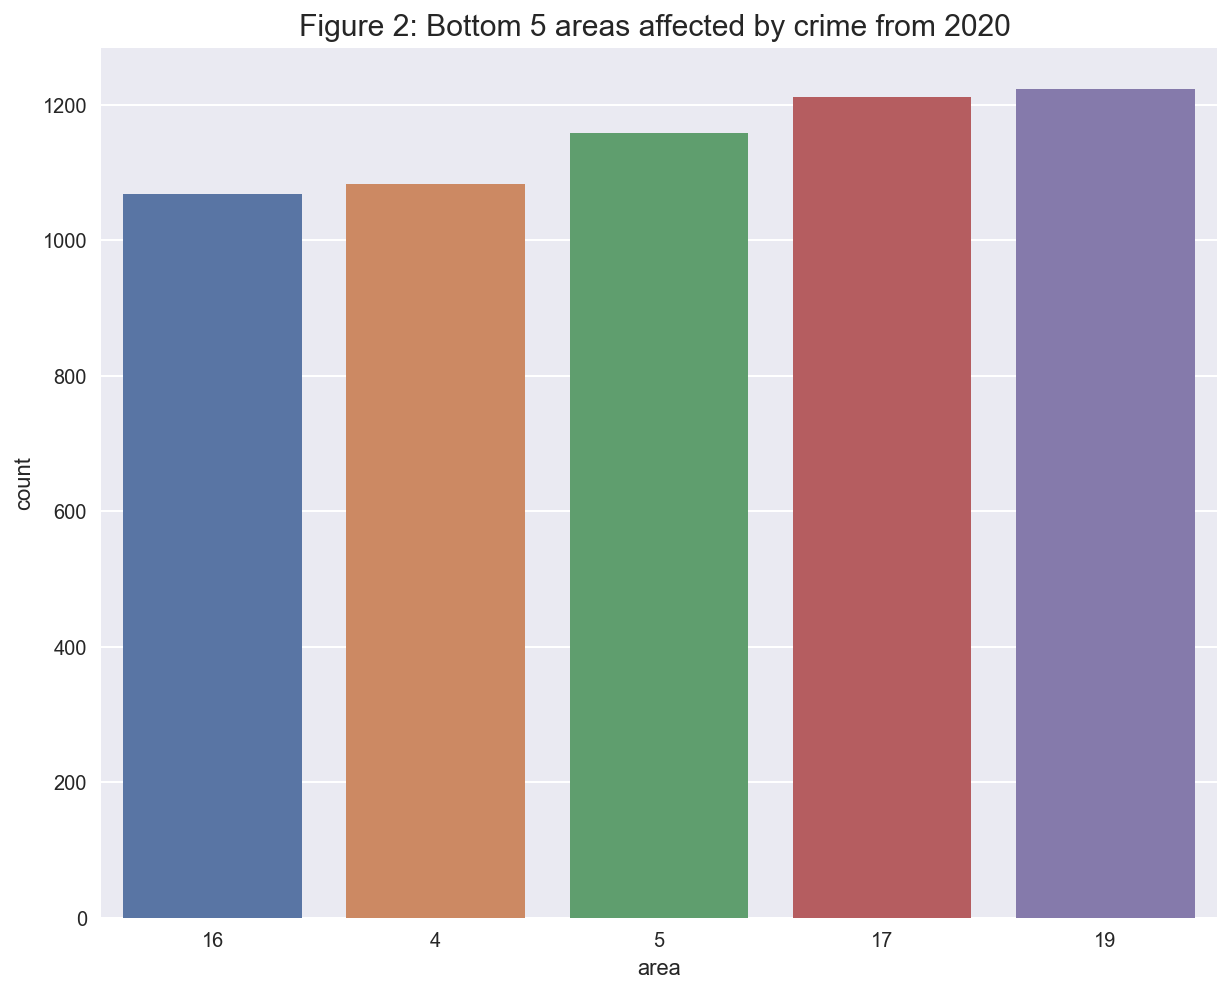

In [12]:
#Top 10
Rank_10 = df_sample['area'].value_counts().nlargest(10).index.tolist()

plt.figure(figsize = (10,8))

fig_1 = sns.countplot(x = 'area', data = df_sample, palette = 'pastel', 
                    order = Rank_10)
fig = plt.title('Figure 1: Top 10 areas affected by crime from 2020 ', fontsize = 15)
plt.show()

# bottom 5
Rank_5 = df_sample['area'].value_counts().nsmallest(5).index.tolist()

plt.figure(figsize = (10,8))

fig_2 = sns.countplot(x = 'area', data = df_sample, palette = 'deep', 
                    order = Rank_5)
fig = plt.title('Figure 2: Bottom 5 areas affected by crime from 2020 ', fontsize = 15)
plt.show()

* Bar chart of number of crimes by sex
The following graph shows the number of crime occurrence in LA from 2020 by sex definition. In overall, there more male victims of crimes than females, but the difference is not significant 

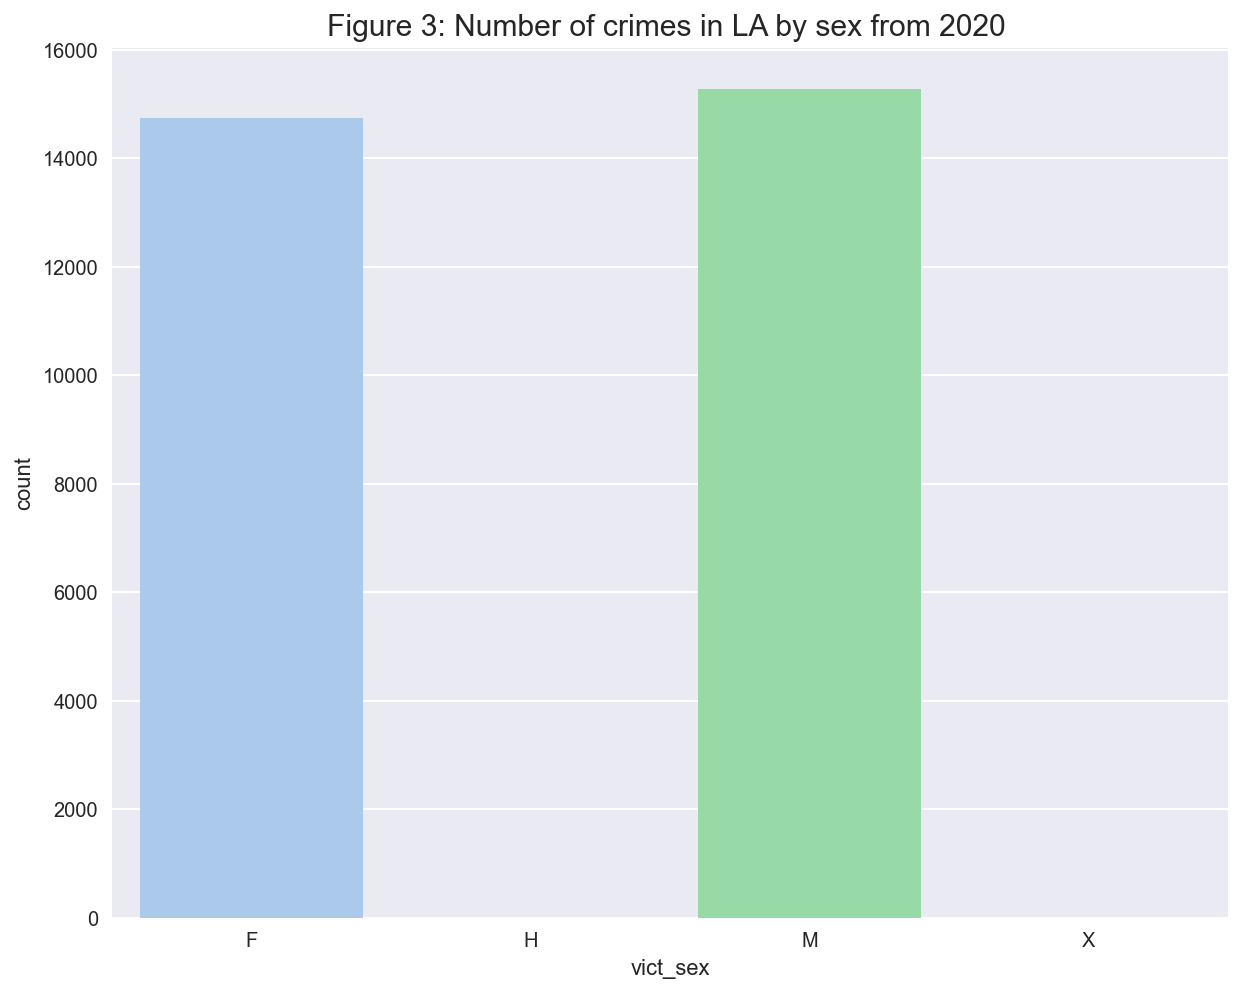

In [13]:
plt.figure(figsize = (10,8))

fig_3 = sns.countplot(x = 'vict_sex', data = df_sample, palette = 'pastel')

fig = plt.title('Figure 3: Number of crimes in LA by sex from 2020 ', fontsize = 15)
plt.show()


* Box plot and Histogram of victims age
The boxplot below shows the normally age of the victims of crime in LA from  2020. The minimun  age of a victim was 2 and the maximum is 99 years old. The normal range of the victims age is in between 25 to 50 years old. Additionally, the histrogram shows a normal distribution skewed to the right of the data.

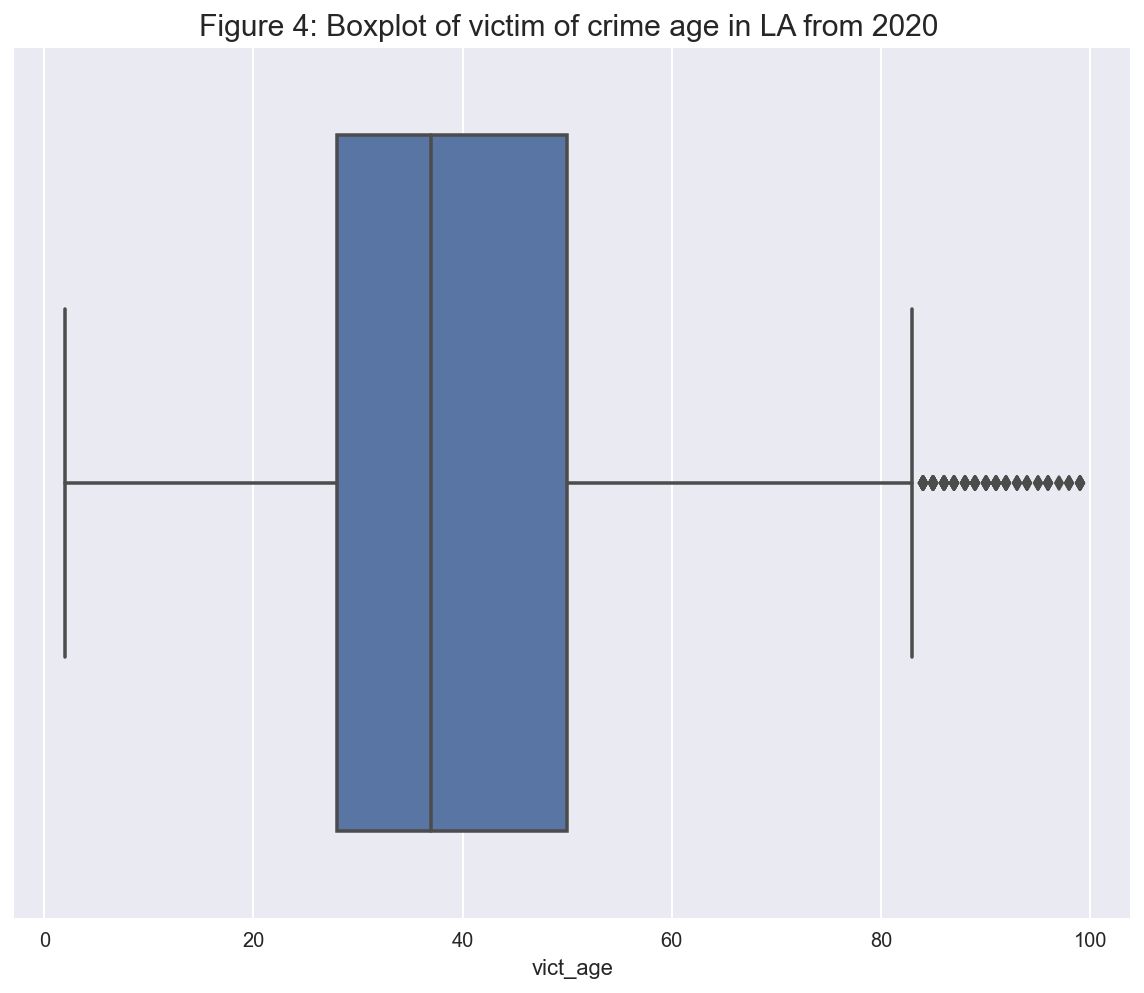

In [14]:
plt.figure(figsize = (10,8))

fig_4 = sns.boxplot(x = 'vict_age', data = df_sample).set_title('Figure 4: Boxplot of victim of crime age in LA from 2020 ',
                                                                fontsize = 15)
plt.show()


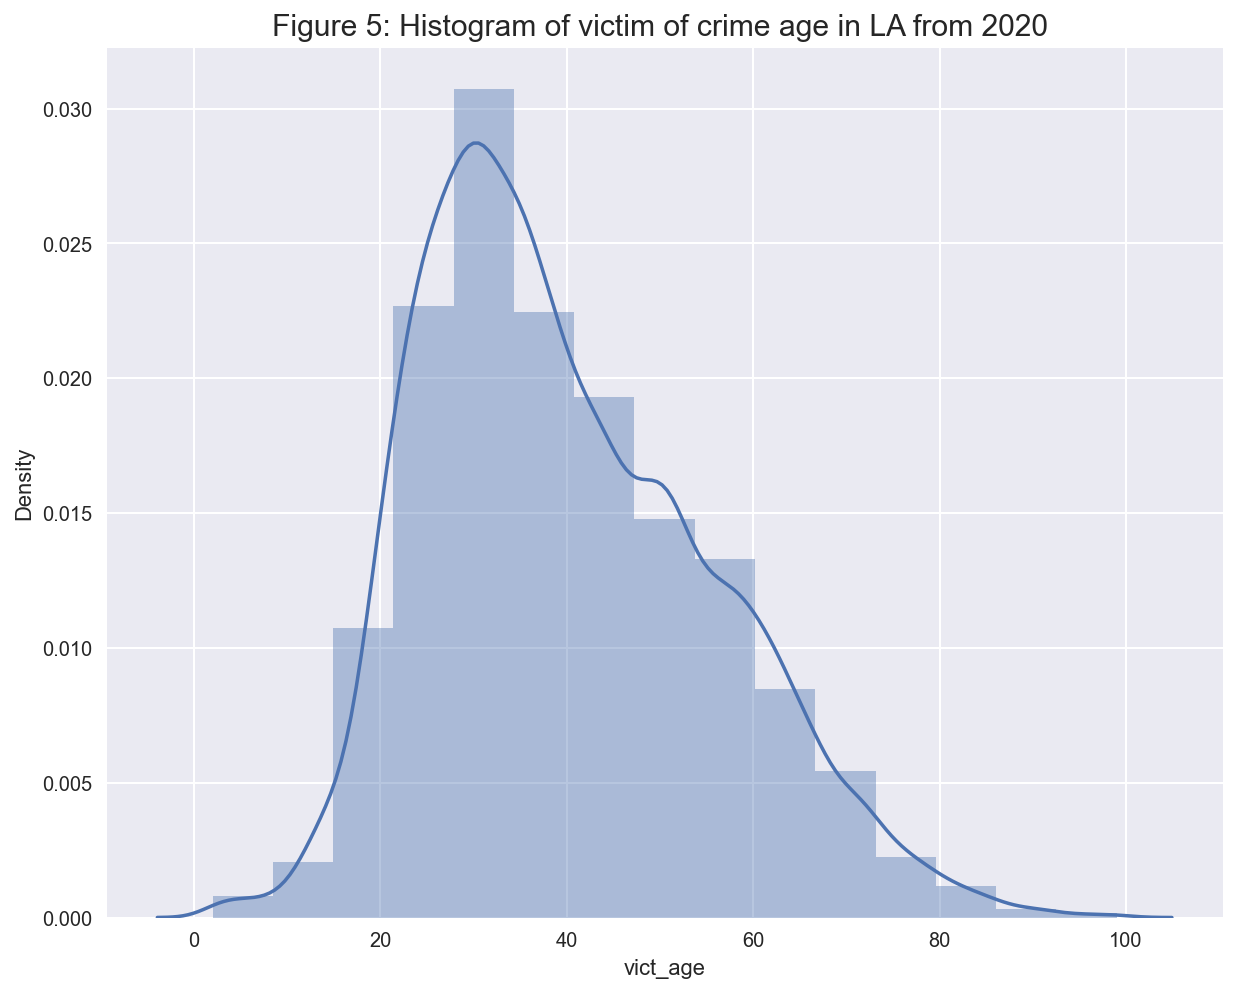

In [15]:
plt.figure(figsize = (10,8))

fig_5 = sns.distplot(df_sample['vict_age'],kde=True,bins=15).set_title('Figure 5: Histogram of victim of crime age in LA from 2020 ',
                                                                fontsize = 15)
plt.show()


* Box plot and Histogram of victims age
The boxplot below shows the normally age of the victims of crime in LA from  2020. The minimun  age of a victim was 2 and the maximum is 99 years old. The normal range of the victims age is in between 25 to 50 years old. Additionally, the histrogram shows a normal distribution skewed to the right of the data.

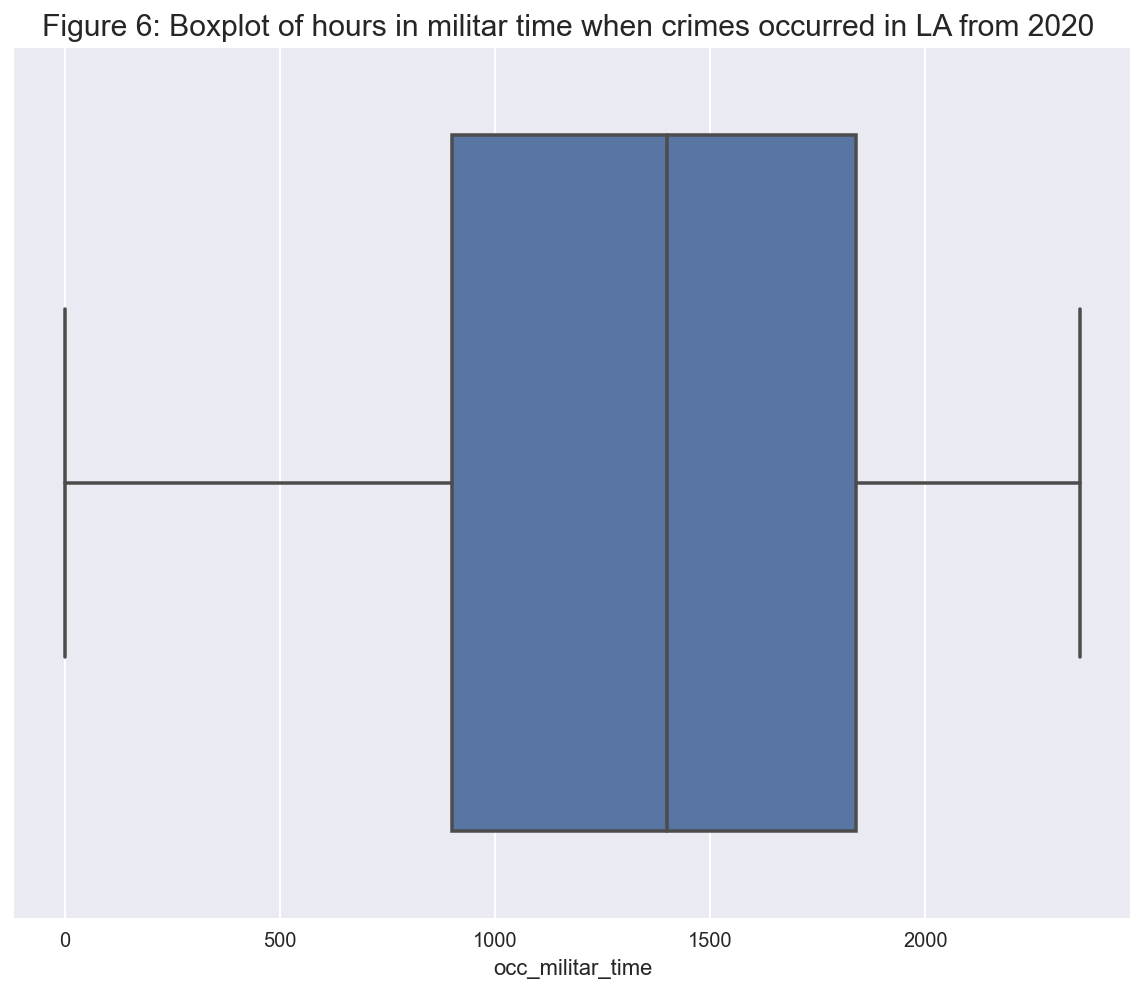

In [16]:
plt.figure(figsize = (10,8))

fig_6 = sns.boxplot(x = 'occ_militar_time', data = df_sample).set_title('Figure 6: Boxplot of hours in militar time when crimes occurred in LA from 2020 ',
                                                                fontsize = 15)
plt.show()

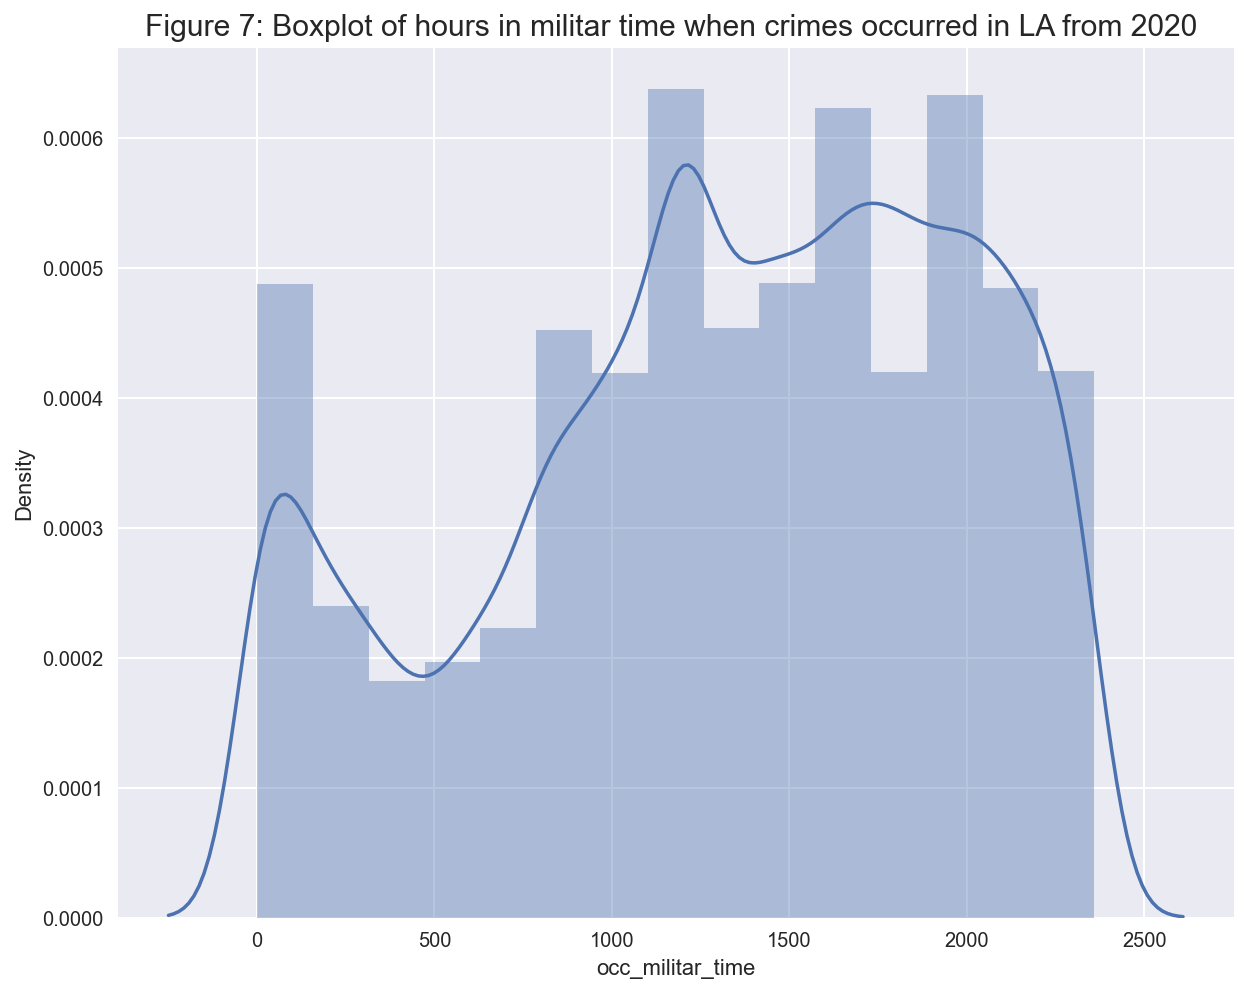

In [17]:
plt.figure(figsize = (10,8))

fig_7 = sns.distplot(df_sample['occ_militar_time'],kde=True,bins=15).set_title('Figure 7: Boxplot of hours in militar time when crimes occurred in LA from 2020 ',
                                                                fontsize = 15)
plt.show()


In [18]:
df_sample.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
occ_day,29998.0,7.0,4.0,4525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occ_militar_time,29998.0,NaN,NaN,NaN,1316.488799,654.865105,1.0,900.0,1400.0,1840.0,2359.0
area,29998.0,21.0,1.0,2109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crm_code,29998.0,107.0,624.0,3119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vict_age,29998.0,NaN,NaN,NaN,39.824188,15.534543,2.0,28.0,37.0,50.0,99.0
vict_sex,29998,2,M,15269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vict_descent,29998,18,H,12117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
premis_code,29998.0,244.0,501.0,6639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weapon_used_code,29998.0,69.0,500.0,18523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,29998.0,NaN,NaN,NaN,33.971259,1.887475,0.0,34.0145,34.0593,34.1667,34.3292


In [19]:

df_sample["vict_sex"].unique()

['F', 'M']
Categories (4, object): ['F', 'H', 'M', 'X']

### Multivariate Analysis <a id='ma'></a>

* Boxplot of victim of crime age by day of occurrence

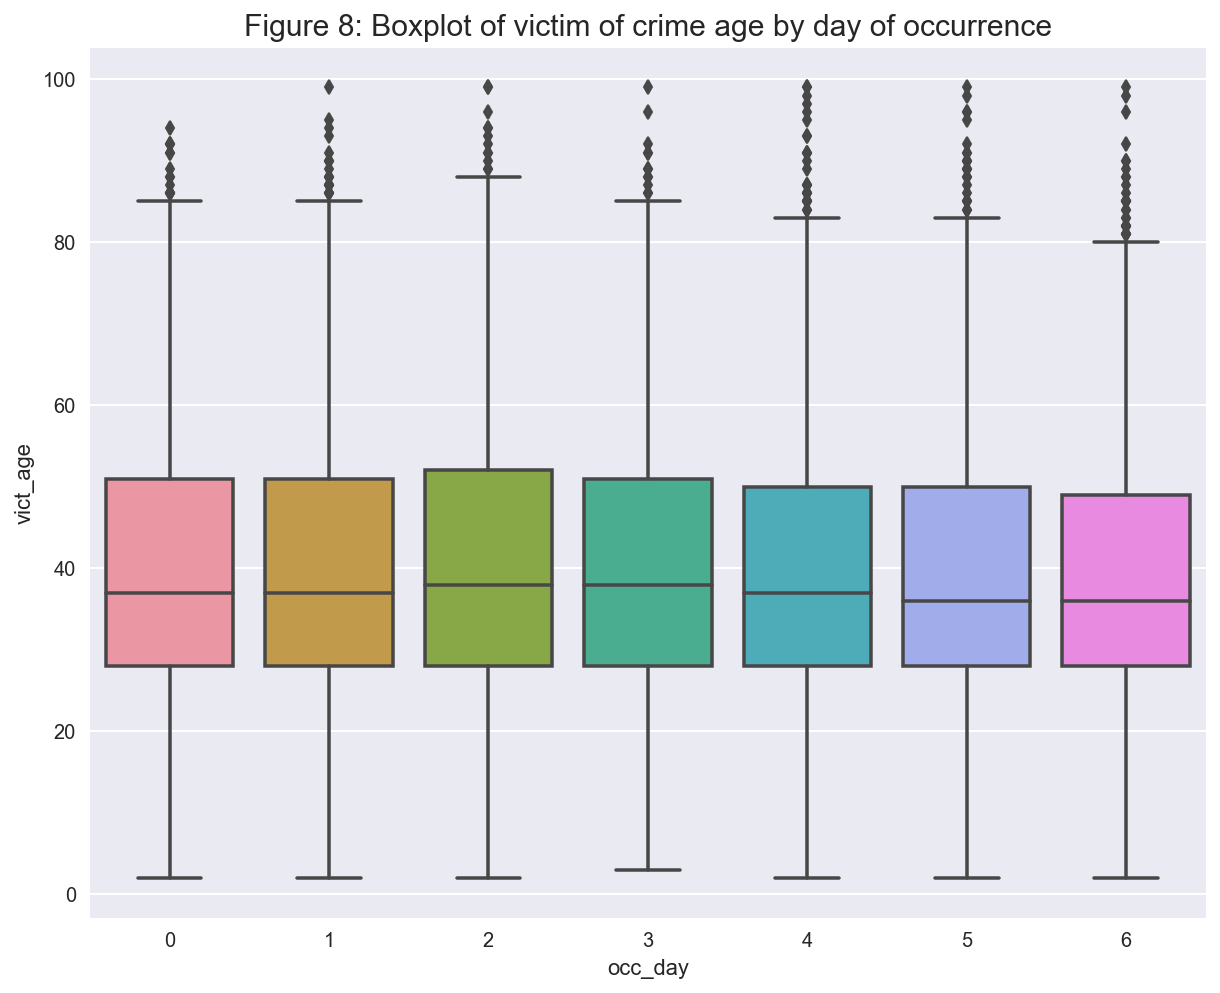

In [20]:
plt.figure(figsize = (10,8))

fig_8 = sns.boxplot(df_sample['occ_day'], df_sample['vict_age']).set_title('Figure 8: Boxplot of victim of crime age by day of occurrence',
                                                                fontsize = 15)

plt.show()

* Boxplot of victim of crime age by LA Area.

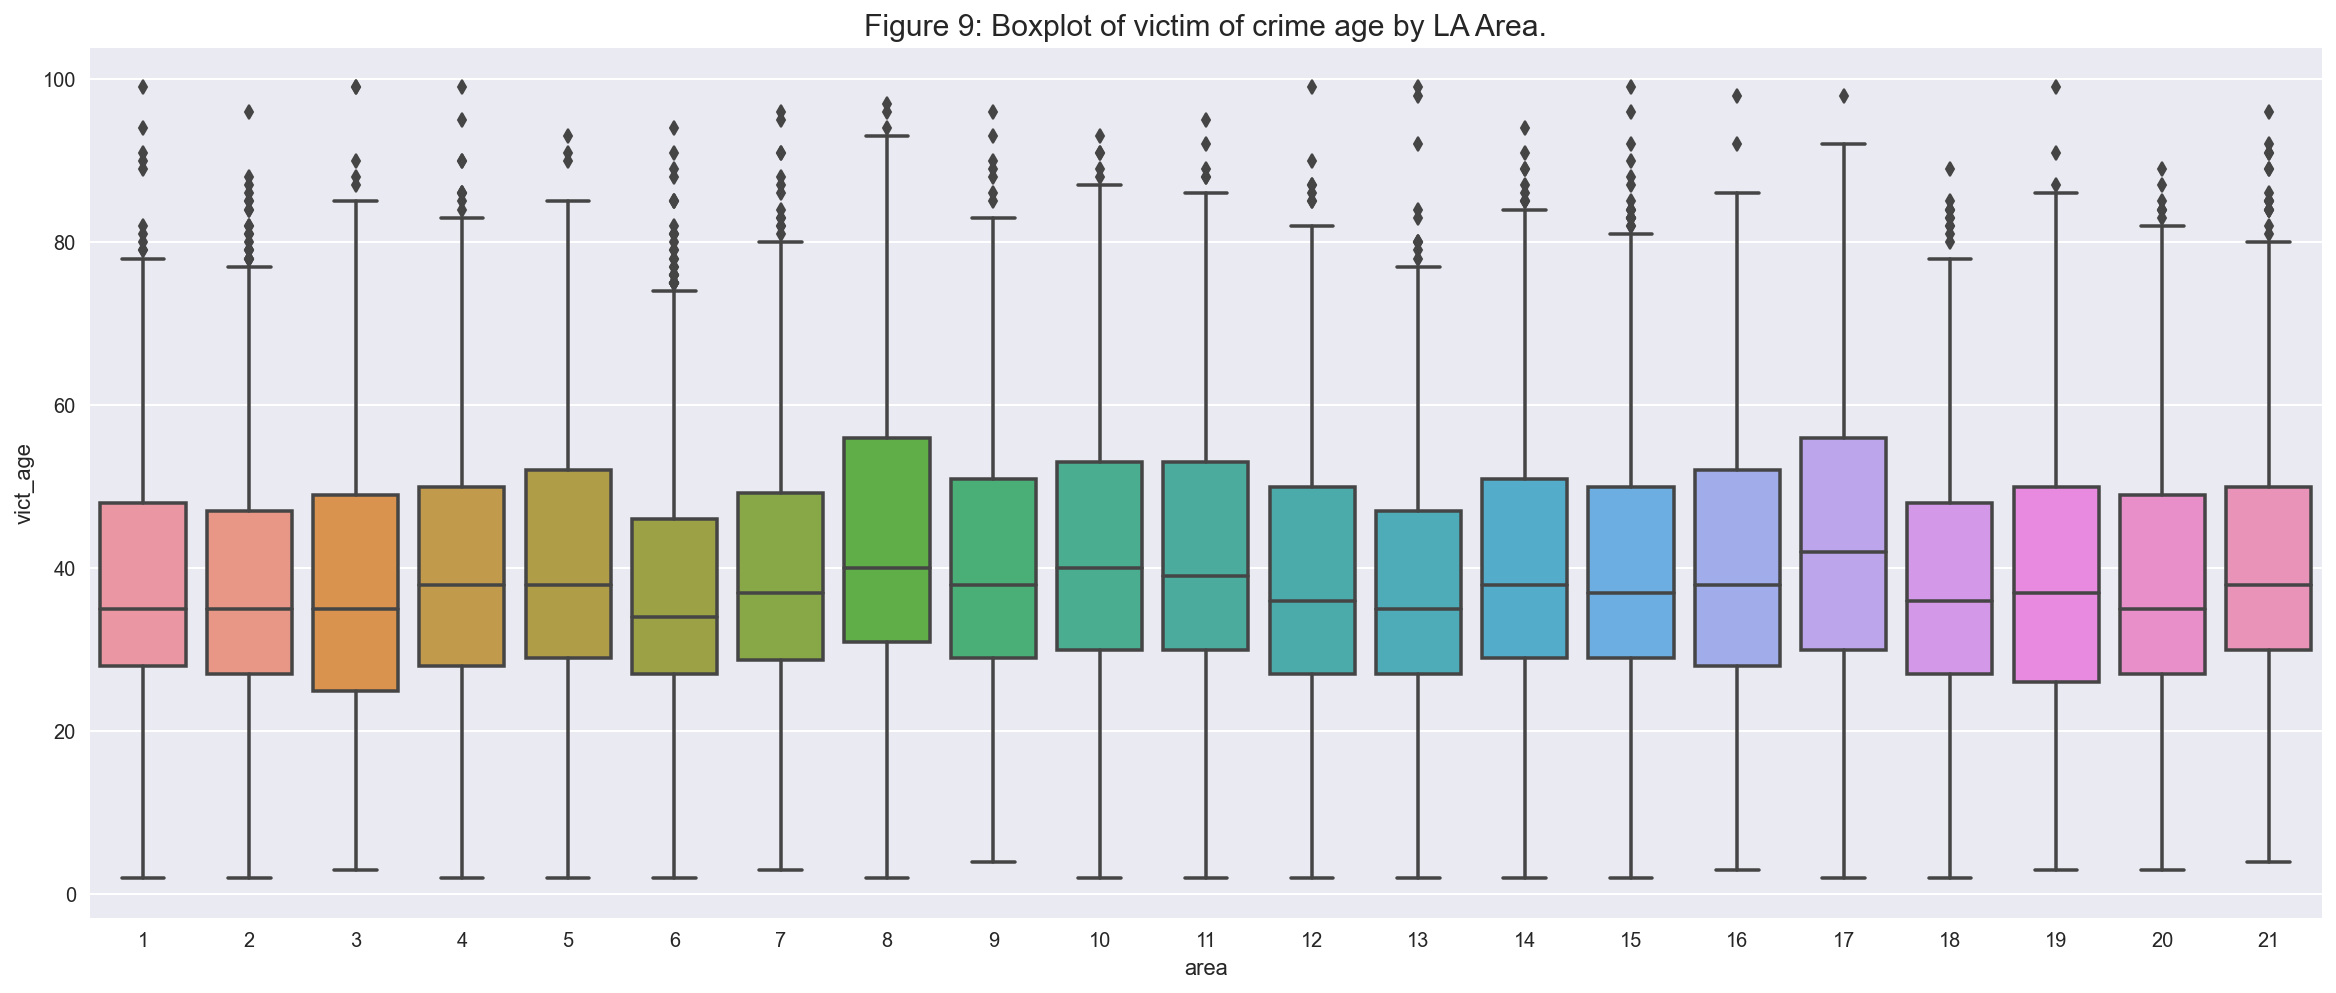

In [21]:
plt.figure(figsize = (20,8))

fig_9 = sns.boxplot(df_sample['area'], df_sample['vict_age']).set_title('Figure 9: Boxplot of victim of crime age by LA Area.',
                                                                fontsize = 15)

plt.show()

* Boxplot of victim of crime age by LA Area.

In [22]:
plt.figure(figsize = (15,8))

fig_10 = sns.catplot(x=df_sample[])

plt.show();

SyntaxError: invalid syntax (3949377988.py, line 3)

## Literature Review <a id='lr'></a>

## Conclusions <a id='c'></a>

## References <a id='r'></a>